# Importons tout d'abord les données

In [38]:
import numpy as np
import pandas as pd
raw_data = pd.read_csv('train.csv')

raw_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


# Encadrons de manière chiffrée les labels

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
raw_data['species'] = labelencoder.fit_transform(raw_data['species'])
raw_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


# Séparons les données en train/test

In [40]:
from sklearn.model_selection import train_test_split

# On récupère les features d'un côté...
X = raw_data.iloc[:,2:-1]

# et les labels de l'autre
y = raw_data.iloc[:,1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Commencons avec un classifieur k-NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params = {'n_neighbors': np.linspace(2,11,10, dtype = int)}

gs_knn = GridSearchCV(knn, params, cv=10)

gs_knn.fit(X_train,y_train)

/Users/theomeborck/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [42]:
gs_knn.best_params_

{'n_neighbors': 3}

In [43]:
gs_knn.score(X_test,y_test)

0.8787878787878788

Le meilleur k-NN est obtenu avec **k = 3** et on obtient, avec une validation croisée, un score pour la précision moyenne de **0,8788**.

# Essayons maintenant avec une SVM linéaire en OneVersusRest

In [44]:
from sklearn.svm import LinearSVC

In [45]:
svm = LinearSVC()
params = { 'C': np.logspace(-3, 3, 7) }

gs_svm = GridSearchCV(svm, params, cv=10)
gs_svm.fit(X_train, y_train)

y_prob = gs_svm.predict(X_test)

/Users/theomeborck/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


### Visualisation des différents scores selon le paramètre C

In [46]:
scores = gs_svm.cv_results_['mean_test_score']

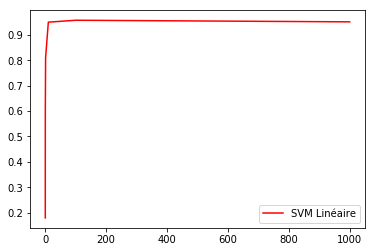

In [47]:
import matplotlib.pyplot as plt

parametres = np.array([10**(i-3) for i in range(7)])
plt.plot(parametres,scores, color='r', label="SVM Linéaire")
plt.legend(loc='best')
plt.show()

In [48]:
gs_svm.best_params_

{'C': 100.0}

In [49]:
gs_svm.score(X_test, y_test)

0.9595959595959596

La précision moyenne maximale obtenue sur les données test est **0.9596** avec le paramètre **C = 100**.

## Conclusion

Le meilleur modèle obtenu sur ces données est donc ici le **SVM linéaire multiclasse** en mode *One VersusRest*.